
---
<big><big><big><big><big><big>Metody uczenia maszynowego</big></big></big></big></big></big>

---





---
<big><big><big><big><big>Problemy uczenia maszynowego</big></big></big></big></big>

---



---

<id=tocheading><big><big><big><big>Spis treści</big></big></big></big>
<div id="toc"></div>

---


In [1]:
%%javascript
$.getScript('https://kmahelona.github.io/ipython_notebook_goodies/ipython_notebook_toc.js')

<IPython.core.display.Javascript object>

In [2]:
# -*- coding: utf-8 -*-

import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
plt.style.use("fivethirtyeight")

from bokeh.io import gridplot, output_file, show
from bokeh.plotting import figure, output_notebook
from bkcharts import Scatter

In [3]:
output_notebook()
sns.set(font_scale=2.0)

Loading BokehJS ...

# Problemy uczenia maszynowego

## Estymacja gęstości
1. dane: N punktów w wielowymiarowej przestrzeni
2. cel: estymacja gęstości prawdopodobieństwa
  * __klastrowanie__ próba znalezienia struktury danych
  * __identyfikacja anomalii__ wyszukiwanie obszarów niskiej gestości i ich opis
  * __identyfikacja skupisk__ umożliwia etykietowanie punktów
3. modele
  * histogram
  * modele kernelowe
  * metody najbliższych sąsiadów

In [4]:
import astroML

In [5]:
from astroML.density_estimation import KNeighborsDensity

X = np.random.normal(size=(1000, 2))
knd = KNeighborsDensity("bayesian", 10)
knd.fit(X)
dens = knd.eval(X)

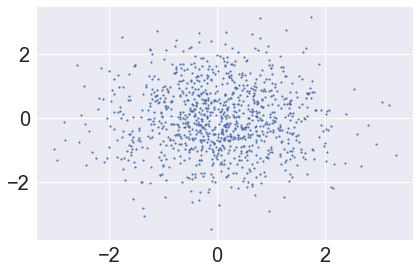

In [6]:
plt.scatter(X[:, 0], X[:, 1], s=3.)

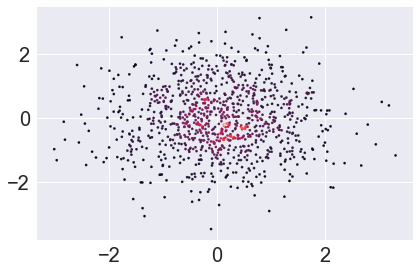

In [7]:
plt.scatter(X[:, 0], X[:, 1], s=5., c=dens)

## Redukcja wymiarowości
1. __Przekleństwo wymiarowości__
  * dane: N przykładów, każdy wektorem o wymiarze D w hipersześcianie $[-1, 1]^D$
  * rozkład równomierny

<img src="../mum_figures/curse_of_dimensionality.png" width="100%">

* jaka jest szansa, że dowolny punkt lezy w odległosci co najwyżej 1 od środka układu współrzędnych?
  * dla $D=2$ mamy $$\pi r^2/(2r)^2 \simeq 0.785$$
  * dla $D=3$ mamy $$(4/3)\pi r^3 / (2r)^3 \simeq 0.523$$
* ten współczynnik bardzo szybko maleje
  * punkty danych stają się coraz bardziej od siebie odległe
* uczenie maszynowe polega na znajdywaniu _podobieństw_
  * punkty odległe od siebie są coraz mniej "podobne"
  * wraz ze wzrostem $D$ będzie potrzeba coraz większego N punktów - wzrost jest __wykładniczy__
  
* zwykle cechy danych są ze sobą skorelowane
* wiele cech (ang. features) __nie ma__ wpływu na poszukiwane wartości
* potrzebna jest redukcja wymiarowości
  * zmniejszy wymagane minimalne N
  * usunięcie skorelowanych i nieistotnych cech
  * niektóre cechy są kombinacjami liniowymi innych
  
2. narzędzia
  * Principal Component Analysis PCA
  * Independent Component Analysis ICA
  * manifold learning

## Regresja
1. dane opisują nieznaną funkcję $F$
2. budujemy model $$y=f(x\mid \theta)$$ 

3. Modele
  * regresja liniowa
    * wielomianowe funkcje bazowe)
  * regresja nieliniowa
  * metody regularyzacji
  * metody kernelowe
  * metody Bayesowskie

## Klasyfikacja
1. __dane__ $$\{(x_i, y_i),i=1,\dots,N\}$$ przy czym $$y_i\in\{1,\dots,K\}$$ który jest zbiorem __możliwych__ klas
2. __cel__ model przewidujący poprawną odpowiedź z najmniejszym oczekiwanym błędem
  * interesuje nas błąd na zbiorze przykładów, których algorytm budujący model __nie__ widział
3. __modele__
  * klasyfikator Bayesowski i naiwny klasyfikator Bayesowski
  * logistic regression
  * metody dyskryminacyjne
  * klasyfikacja z wykorzystaniem metod najbliższych sąsiadów
  * Support Vector Machines SVM
  * drzewa decyzyjne i lasy drzew
  * drzewa gradient boosted
  * modele składające wyniki, np. AdaBoost
  

## Analiza szeregów czasowych
1. __dane__ $$(t_1, y_1), (t_2, y_2), \dots, (t_N, y_N)$$
2. __cel__ przewidzenie $y_{k+1}$ na podstawie $$(t_{k-p},y_{p}),\dots,(t_k,y_k)$$
  * celem może być zarówno regresja jak i klasyfikacja
3. __problemy__
  * wartość $y_k$ zależy bezpośrednio od poprzednich (inaczej niż w regresji)
  * wiele danych jest szumem
  * w danych występują trendy i okresowości
  * problem szerokości okienka
    * zanikanie wpływu starych danych, ale istnienie wpływu pamięci długoterminowej
4. __modele__
  * ARMA
  * analiza fourierowska i falkowa
  * sieci neuronowe

# Modele uczenia
---
## nadzorowane
  * dane $$\{(x_i,y_i)\}$$ gdzie $y_i$ jest __poprawną odpowiedzią__
  * algorytm modyfikuje parametry modelu w kolejnych krokach
  * algorytm porównuje odpowiedź modelu z poprawną uzyskując __błąd__
  * błąd wpływa na modyfikację parametrów tak by minimalizować całkowity błąd
---
## nienadzorowane
  * dane w postaci $$\{x_i\}$$ __bez__ prawidłowej wartości
  * algorytm wyszukuje __statystyczne__ zależności
  * efektem może być podział na skupiska (klastrowanie)
    * ekspert może określić klasy dla skupisk
  * może być wstępem do uczenia nadzorowanego
    * dane __etykietowane__ są bardzo kosztowne
    * należy wykorzystać wszystkie dostępne
  * także uczenie połączone semi-nadzorowane
---
## ze wzmocnieniem (ang. reinforcement)
  * w nadzorowanym zdefiniowana _a priori_ funkcja kosztu
  * ale może nie być dostępna wartość _prawidłowa_
  * niech wartością referencyjną będzie __odpowiedź środowiska__
  * bardzo aktywnie rozwijane